#Task 3: Linear Regression - Housing Price Prediction

## Importing Necessary Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

## Loading Dataset from Kaggle

In [61]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d harishkumardatalab/housing-price-prediction
!unzip -o housing-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction
License(s): CC0-1.0
housing-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  housing-price-prediction.zip
  inflating: Housing.csv             


In [62]:
df = pd.read_csv("Housing.csv")
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Exploratory Data Analysis

In [63]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [65]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [66]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [67]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [68]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Encode Categorical Columns

In [69]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

furnish_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnish_map)

print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


## Data Splitting

In [70]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluating Model Performance

In [72]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 979679.6912959901
Mean Squared Error: 1771751116594.0352
Root Mean Squared Error: 1331071.4167895108
R² Score: 0.6494754192267803


MAE ≈ ₹9.8 lakh → On average, predictions are off by about ₹9.8 lakh.

RMSE ≈ ₹13.3 lakh → Large errors have a bigger effect here, so the model sometimes predicts much farther from the actual price.

R² ≈ 0.65 → Your model explains about 65% of the variation in house prices.

In [73]:
df.shape

(545, 13)

## Outlier Removal using IQR

In [74]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'area')
print("After outlier removal:", df.shape)

After outlier removal: (517, 13)


Means no outliers are found

## Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Training

In [76]:
from sklearn.linear_model import LinearRegression, Ridge

In [77]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

In [78]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = math.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("\n--- Linear Regression ---")
print(f"MAE: {mae_lin}")
print(f"RMSE: {rmse_lin}")
print(f"R²: {r2_lin}")


--- Linear Regression ---
MAE: 979679.6912959901
RMSE: 1331071.4167895108
R²: 0.6494754192267803


Model Performance is not improved

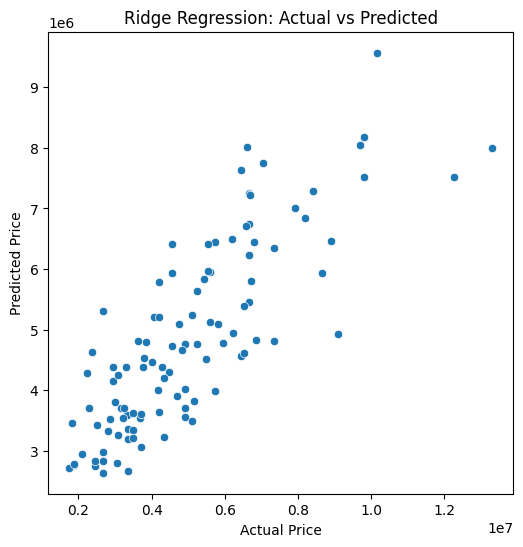

In [79]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lin)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

## Model Training Ridge Regression

In [80]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [81]:

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge Regression ---")
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R²: {r2_ridge}")


--- Ridge Regression ---
MAE: 980105.6394817502
RMSE: 1332000.7201472826
R²: 0.6489858025515296


Ridge mainly helps when the dataset has multicollinearity (highly correlated features) or too many irrelevant features.

Our dataset is small and already fairly clean, so regularization doesn’t change much.

The main limiting factor is probably missing non-linear patterns and unoptimized features, not overfitting.

## Feature Engineering

In [82]:
df['price_per_sqft'] = df['price'] / df['area']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
amenity_cols = ['mainroad', 'guestroom', 'basement',
                'hotwaterheating', 'airconditioning', 'prefarea']
df['luxury_score'] = df[amenity_cols].sum(axis=1)


In [83]:
df['house_size'] = pd.cut(df['area'],
                           bins=[0, 2000, 5000, 8000, np.inf],
                           labels=['Small', 'Medium', 'Large', 'Very Large'])

In [84]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,total_rooms,luxury_score,house_size
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,1516.666667,5,2,Large
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1378.787879,6,5,Large
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2,1054.117647,5,2,Very Large
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2,1932.608696,5,3,Medium
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,1379.283489,5,3,Large


In [85]:
size_map = {'Small': 0, 'Medium': 1, 'Large': 2, 'Very Large': 3}
df['house_size'] = df['house_size'].map(size_map)

## Data splitting and Model Training

In [86]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

In [87]:
# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_pred_lin = lin_model.predict(X_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## Model Evaluation and Plotting Prediction

In [91]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression
MAE: 445076.07
RMSE: 634321.98
R²: 0.8629

Ridge Regression
MAE: 445140.93
RMSE: 631612.15
R²: 0.8640

Random Forest
MAE: 212545.11
RMSE: 342225.50
R²: 0.9601


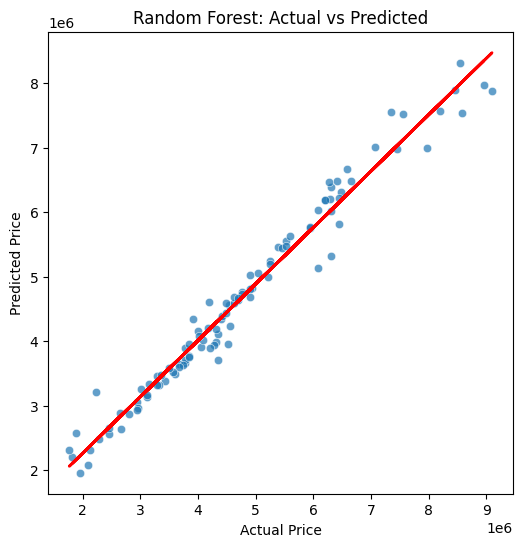

In [90]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)

# Add a best-fit line
z = np.polyfit(y_test, y_pred_rf, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linewidth=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


## Feature Importance (Random Forest)


In [89]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
             Feature  Importance
12    price_per_sqft    0.422491
0               area    0.415224
14      luxury_score    0.073540
8    airconditioning    0.034052
2          bathrooms    0.012649
9            parking    0.009123
3            stories    0.008236
11  furnishingstatus    0.007399
13       total_rooms    0.006440
15        house_size    0.003125
1           bedrooms    0.002001
10          prefarea    0.001626
5          guestroom    0.001615
6           basement    0.000991
4           mainroad    0.000821
7    hotwaterheating    0.000666


## Conclusion

After implementing **feature engineering** (`price_per_sqft`, `total_rooms`, `luxury_score`, `house_size`) and retraining the models:

- **Model Performance** improved drastically from an initial R² of ~0.65 to:
  - **Linear Regression:** R² = **0.8629**, MAE ≈ ₹4.45 L
  - **Ridge Regression:** R² = **0.8640**, MAE ≈ ₹4.45 L
  - **Random Forest Regressor:** R² = **0.9601**, MAE ≈ ₹2.12 L

- **Key Takeaways:**
  1. Feature engineering played the biggest role in improving accuracy.
  2. Random Forest captured non-linear relationships and interactions better, achieving the **highest accuracy**.
  3. Linear and Ridge models still performed strongly and are easier to interpret.

- **Final Recommendation:**
  - Use **Random Forest** if prediction accuracy is the priority.
  - Use **Linear Regression** if interpretability and coefficient analysis are important.
  - Retain the engineered features for future datasets, as they significantly improve model performance.
